In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


## MODELING TORONTO ONLY DATA 

In [2]:
df = pd.read_csv('model_data/Torontoaggregated.csv',index_col=0,parse_dates=True)

In [3]:
df['total_individuals_fully_vaccinated']= df['total_individuals_fully_vaccinated'].replace(np.nan,0)

In [4]:
df.columns

Index(['date', 'oh_region', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented', 'icu_former_covid_vented',
       'Daily_Covid_Num', 'Cum_Covid_Numbers', 'covid_advice',
       'total_doses_administered', 'total_individuals_fully_vaccinated'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                124 non-null    object 
 1   oh_region                           124 non-null    object 
 2   ICU                                 124 non-null    int64  
 3   ICU_vented                          124 non-null    int64  
 4   hospitalizations                    124 non-null    int64  
 5   icu_crci_total                      124 non-null    int64  
 6   icu_crci_total_vented               124 non-null    int64  
 7   icu_former_covid_vented             124 non-null    int64  
 8   Daily_Covid_Num                     124 non-null    int64  
 9   Cum_Covid_Numbers                   124 non-null    int64  
 10  covid_advice                        124 non-null    object 
 11  total_doses_administered            124 non-n

In [6]:
df1 = df[['date', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented',
       'total_individuals_fully_vaccinated',
       'Daily_Covid_Num']]


df2 = df[['date', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented',
       'total_individuals_fully_vaccinated',
       'Cum_Covid_Numbers']]




In [7]:
# df1a['report_date'] =pd.to_datetime(df1a['report_date'])

In [8]:
df1['date'] =pd.to_datetime(df1['date'])
df1=df1.set_index('date')
df2['date'] =pd.to_datetime(df2['date'])
df2=df2.set_index('date')

<ipython-input-8-9a57376be025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] =pd.to_datetime(df1['date'])
<ipython-input-8-9a57376be025>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] =pd.to_datetime(df2['date'])


In [9]:
# df1 = df1a.drop('report_date',axis=1)
# df2 = df2a.drop('report_date',axis=1)



In [10]:
df1.head()

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
date,,,,,,,
2020-12-24,59,37,159,67,40,0.0,844
2020-12-30,64,40,215,70,43,0.0,856
2020-12-31,70,43,212,75,44,0.0,853
2021-01-01,66,47,198,73,51,0.0,956
2021-01-02,65,44,203,71,46,0.0,938


In [11]:
df2.head()

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Cum_Covid_Numbers
date,,,,,,,
2020-12-24,59,37,159,67,40,0.0,58584
2020-12-30,64,40,215,70,43,0.0,63599
2020-12-31,70,43,212,75,44,0.0,64452
2021-01-01,66,47,198,73,51,0.0,65408
2021-01-02,65,44,203,71,46,0.0,66346


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-12-24 to 2021-05-01
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ICU                                 124 non-null    int64  
 1   ICU_vented                          124 non-null    int64  
 2   hospitalizations                    124 non-null    int64  
 3   icu_crci_total                      124 non-null    int64  
 4   icu_crci_total_vented               124 non-null    int64  
 5   total_individuals_fully_vaccinated  124 non-null    float64
 6   Daily_Covid_Num                     124 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.8 KB


In [13]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [14]:
df1.corr()

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
ICU,1.000000,0.970525,0.921797,0.996609,0.960506,0.290873,0.555923
ICU_vented,0.970525,1.000000,0.927020,0.966927,0.993801,0.164183,0.473659
hospitalizations,0.921797,0.927020,1.000000,0.901512,0.896695,0.019489,0.647333
icu_crci_total,0.996609,0.966927,0.901512,1.000000,0.963551,0.321453,0.526363
icu_crci_total_vented,0.960506,0.993801,0.896695,0.963551,1.000000,0.178077,0.403550
total_individuals_fully_vaccinated,0.290873,0.164183,0.019489,0.321453,0.178077,1.000000,0.232951
Daily_Covid_Num,0.555923,0.473659,0.647333,0.526363,0.403550,0.232951,1.000000


In [15]:
matrix = np.triu(df1.corr())

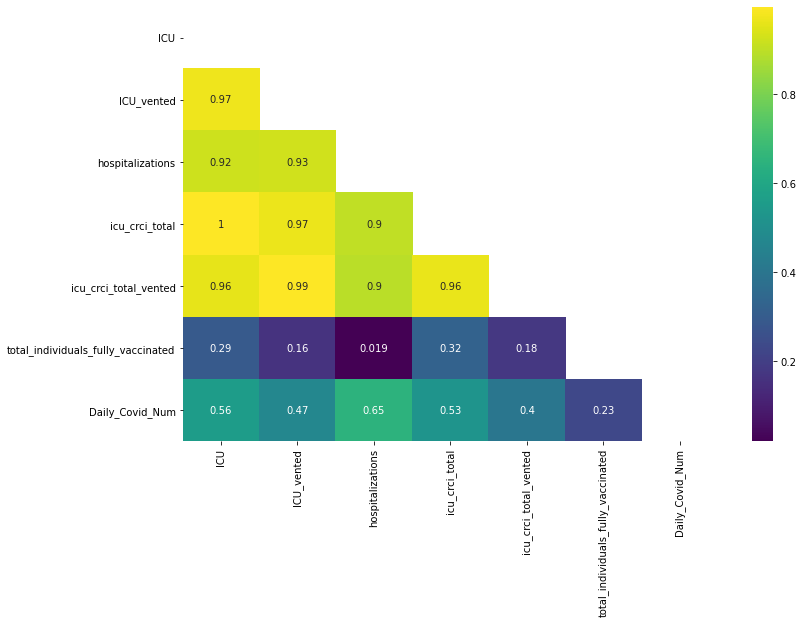

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),mask=matrix,cmap='viridis',annot=True)
plt.show()

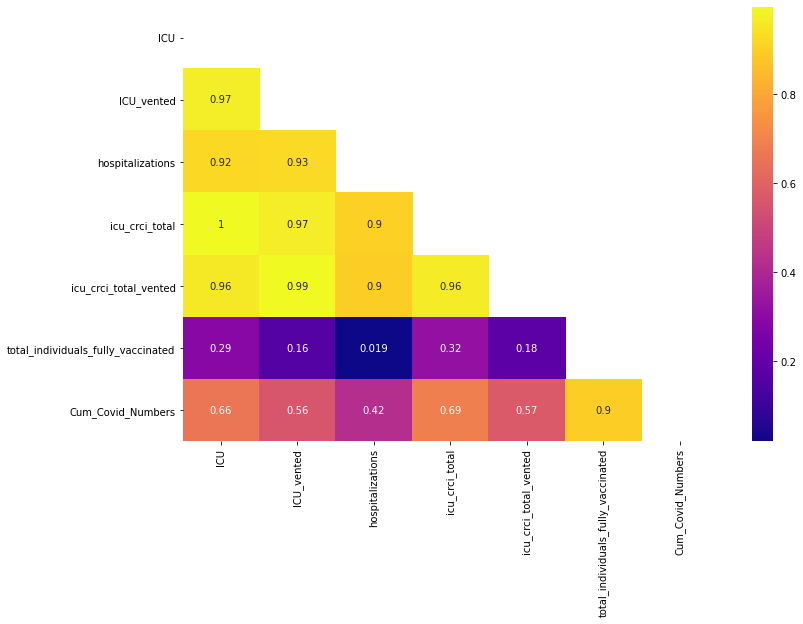

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),mask=np.triu(df2.corr()),cmap='plasma',annot=True)
plt.show()

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data,variables, test='ssr_chi2test', verbose=False):    
    """
    To check that coefficients of past values influences the present value
    
    Null hypothesis: The coefficients of past values in the times series are equal to zero 
    

   Response variableaa: rows, Predictors:columns
   The values in the table are the P-Values. P-Values lesser than the significance level (0.05), 
   implies the Null hypothesis that the coefficients of the corresponding past values is zero,
    that is, the X does not cause Y can be rejected.

    data      : dataframe containing the time series variables
    variables : names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df1, variables = df1.columns)

,ICU_x,ICU_vented_x,hospitalizations_x,icu_crci_total_x,icu_crci_total_vented_x,total_individuals_fully_vaccinated_x,Daily_Covid_Num_x
ICU_y,1.0000,0.0018,0.0047,0.1116,0.0003,0.0403,0.0
ICU_vented_y,0.0000,1.0000,0.0000,0.0001,0.0018,0.0022,0.0
hospitalizations_y,0.0028,0.0006,1.0000,0.0014,0.0002,0.0024,0.0
icu_crci_total_y,0.0070,0.0000,0.0025,1.0000,0.0000,0.0318,0.0
icu_crci_total_vented_y,0.0000,0.0005,0.0000,0.0000,1.0000,0.0034,0.0
total_individuals_fully_vaccinated_y,0.0191,0.0980,0.0113,0.0109,0.1297,1.0000,0.0
Daily_Covid_Num_y,0.0005,0.0028,0.0000,0.0007,0.0019,0.0004,1.0


In [19]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(df1)

In [20]:
 #out = coint_johansen(df,-1,5)

In [21]:
nobs = 7 #number of days to forecast 
df1_train, df1_test = df1[0:-nobs], df1[-nobs:]

# Check size
print(df1_train.shape) 
print(df1_test.shape)  

(117, 7)
(7, 7)


In [22]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """
    Performing Augumented Dick-Fuller test to check Stationarity of given series and print report
    
    """
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-----------------------------------------------------')
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [23]:
# ADF Test on each column
for name, column in df1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.1811
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9989. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4018
 No. Lags Chosen       = 4
 Critical value 1%     = -3.49
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.9098. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypot

In [24]:
# 1st difference since all series are non-stationary
df1_differenced = df1_train.diff().dropna()

In [25]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6293
 No. Lags Chosen       = 4
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0871. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7873
 No. Lags Chosen       = 3
 Critical value 1%     = -3.49
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.003. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit 

In [26]:
#2nd differencing as some terms are still non-stationary 
df1_differenced = df1_differenced.diff().dropna()

In [27]:
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.8635
 No. Lags Chosen       = 3
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7892
 No. Lags Chosen       = 3
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

In [28]:
#3rd differencing as some terms are still non-stationary 

#df1_differenced = df1_differenced.diff().dropna()

In [29]:
# for name, column in df1_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [30]:
model = VAR(df1_differenced)
for i in range(1,10,1):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  35.67309117977848
BIC :  37.017188663200336
FPE :  3114075438975775.5
HQIC:  36.21858501720994 

Lag Order = 2
AIC :  35.04885945851192
BIC :  37.583157874129576
FPE :  1683904965936872.0
HQIC:  36.07725137238873 

Lag Order = 3
AIC :  34.62735486415502
BIC :  38.365290812185776
FPE :  1132909810607039.0
HQIC:  36.14395432564974 

Lag Order = 4
AIC :  34.35247141223688
BIC :  39.30773835697926
FPE :  905289576059788.2
HQIC:  36.36267674730284 

Lag Order = 5
AIC :  34.26421640591573
BIC :  40.450771425731084
FPE :  905210766457414.2
HQIC:  36.77351652706566 

Lag Order = 6
AIC :  33.975296875303606
BIC :  41.407367632651976
FPE :  781269711379042.2
HQIC:  36.98927303614816 

Lag Order = 7
AIC :  34.295802741172885
BIC :  42.987894680927305
FPE :  1337241649856393.0
HQIC:  37.82013031225972 

Lag Order = 8
AIC :  34.31589713345948
BIC :  44.28280091804172
FPE :  1885288331267967.2
HQIC:  38.35634739769912 

Lag Order = 9
AIC :  33.852074464345755
BIC :  45.108873654

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [31]:
x=model.select_order(maxlags=maxlag)
x.summary()

,AIC,BIC,FPE,HQIC
0,37.89,38.06,2.840e+16,37.96
1,35.55,36.98*,2.755e+15,36.13
2,35.05,37.74,1.697e+15,36.14
3,34.65,38.59,1.169e+15,36.24
4,34.33,39.52,9.032e+14,36.43
5,34.09,40.53,7.878e+14*,36.70
6,33.98,41.68,8.332e+14,37.09
7,34.16,43.12,1.285e+15,37.79
8,34.29,44.50,2.082e+15,38.43
9,33.61,45.07,1.736e+15,38.25


In [32]:
fitted_model = model.fit(2)

In [33]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, May, 2021
Time:                     09:25:02
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    37.5832
Nobs:                     113.000    HQIC:                   36.0773
Log likelihood:          -2997.64    FPE:                1.68390e+15
AIC:                      35.0489    Det(Omega_mle):     7.03715e+14
--------------------------------------------------------------------
Results for equation ICU
                                           coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------
const                                         0.041936         0.384250            0.109           0.913
L1.ICU                                       -0.845802         0.234917

In [34]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))


date : 2.16
oh_region : 2.3
ICU : 2.17
ICU_vented : 2.12
hospitalizations : 2.34
icu_crci_total : 2.07
icu_crci_total_vented : 2.27


In [35]:
lag_order = fitted_model.k_ar

lag_order

2

In [36]:
forecast_input = df1_differenced.values[-lag_order:]
forecast_input

array([[   6.     ,    9.     ,   13.     ,    2.     ,   10.     ,
         504.31704,  220.     ],
       [   5.     ,   -7.     ,    8.     ,    8.     ,  -11.     ,
         -76.07314, -214.     ]])

In [37]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df1.columns + '_2d')
df_forecast

,ICU_2d,ICU_vented_2d,hospitalizations_2d,icu_crci_total_2d,icu_crci_total_vented_2d,total_individuals_fully_vaccinated_2d,Daily_Covid_Num_2d
117,-2.482535,3.105779,-14.788785,-2.816285,6.989644,-370.635455,110.795530
118,-1.866826,-1.080905,12.210771,-2.811148,-2.094767,-65.422904,-16.749895
119,1.872577,1.869200,-4.580809,2.445068,0.460327,116.111942,-5.672683
120,-0.060003,-2.231255,-0.604910,-0.335357,-0.740523,47.073130,13.585743
121,-0.610335,1.229959,0.297828,-0.358499,0.785158,-54.183002,-33.372155
122,0.473202,-0.071402,1.237896,0.321600,-0.314969,18.869300,39.183989
123,-0.153644,-0.739629,-0.904756,-0.229865,-0.490107,12.720407,-30.199692


In [38]:
def invert_transformation(df_train, df_forecast, third_diff=False,second_diff=False):
    """
    Transforming the forecast numbers to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back Differences
        if third_diff:
            df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_3d'].cumsum()  
            
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()       
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [39]:
df_results = invert_transformation(df1_train, df_forecast, third_diff=False,second_diff=True)

In [40]:
df_results.columns

Index(['ICU_2d', 'ICU_vented_2d', 'hospitalizations_2d', 'icu_crci_total_2d',
       'icu_crci_total_vented_2d', 'total_individuals_fully_vaccinated_2d',
       'Daily_Covid_Num_2d', 'ICU_1d', 'ICU_forecast', 'ICU_vented_1d',
       'ICU_vented_forecast', 'hospitalizations_1d',
       'hospitalizations_forecast', 'icu_crci_total_1d',
       'icu_crci_total_forecast', 'icu_crci_total_vented_1d',
       'icu_crci_total_vented_forecast',
       'total_individuals_fully_vaccinated_1d',
       'total_individuals_fully_vaccinated_forecast', 'Daily_Covid_Num_1d',
       'Daily_Covid_Num_forecast'],
      dtype='object')

In [41]:
df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Daily_Covid_Num_forecast']]

In [42]:
# df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Cum_Covid_Numbers_forecast']]

In [43]:
#df1.tail(nobs)

df1_forecasted

,ICU_forecast,ICU_vented_forecast,hospitalizations_forecast,icu_crci_total_forecast,icu_crci_total_vented_forecast,total_individuals_fully_vaccinated_forecast,Daily_Covid_Num_forecast
117,154.517465,108.105779,364.211215,172.183715,119.989644,96009.245105,834.795530
118,157.168104,108.130653,366.633201,173.556282,119.884520,96522.239066,791.841165
119,161.691321,110.024727,364.474378,177.373917,120.239723,97151.344968,743.214117
120,166.154534,109.687546,361.710644,180.856195,119.854403,97827.524001,708.172813
121,170.007413,110.580324,359.244739,183.979974,120.254242,98449.520031,639.759353
122,174.333494,111.401700,358.016728,187.425353,120.339111,99090.385362,610.529881
123,178.505930,111.483447,355.883962,190.640868,119.933873,99743.971100,551.100718


In [44]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-04-25 to 2021-05-01
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ICU                                 7 non-null      int64  
 1   ICU_vented                          7 non-null      int64  
 2   hospitalizations                    7 non-null      int64  
 3   icu_crci_total                      7 non-null      int64  
 4   icu_crci_total_vented               7 non-null      int64  
 5   total_individuals_fully_vaccinated  7 non-null      float64
 6   Daily_Covid_Num                     7 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 448.0 bytes


In [45]:
def accuracy_score(forecast,actual):
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    mape = 100 * np.mean(np.abs(forecast - actual)/np.abs(actual))
    merr = np.mean(np.abs(forecast - actual))
    
    return ({'mean_absolute_pcnt_error':f'{np.round(mape,2)} %', 'root_mean_squared_error' : rmse, 'mean_absolute_error':merr})

In [46]:
accuracy_score(df1_test.iloc[:,1],df1_forecasted.iloc[:,1].values)

{'mean_absolute_pcnt_error': '5.2 %',
 'root_mean_squared_error': 6.6293590735662065,
 'mean_absolute_error': 5.72905938620883}

In [47]:
for i in range(len(df1_test.columns)):
    print('\n')
    print(f'printing the accuracy score of {df1_test.columns[i]}')
    score= accuracy_score(df1_test.iloc[:,i],df1_forecasted.iloc[:,i].values)
    print('----------------------------------------------')
    print(score)
    
    
    



printing the accuracy score of ICU
----------------------------------------------
{'mean_absolute_pcnt_error': '7.41 %', 'root_mean_squared_error': 16.304666574408188, 'mean_absolute_error': 12.715303104637071}


printing the accuracy score of ICU_vented
----------------------------------------------
{'mean_absolute_pcnt_error': '5.2 %', 'root_mean_squared_error': 6.6293590735662065, 'mean_absolute_error': 5.72905938620883}


printing the accuracy score of hospitalizations
----------------------------------------------
{'mean_absolute_pcnt_error': '2.85 %', 'root_mean_squared_error': 13.109082208479103, 'mean_absolute_error': 10.375216142971599}


printing the accuracy score of icu_crci_total
----------------------------------------------
{'mean_absolute_pcnt_error': '4.64 %', 'root_mean_squared_error': 10.377689085597753, 'mean_absolute_error': 8.541210864133584}


printing the accuracy score of icu_crci_total_vented
----------------------------------------------
{'mean_absolute_pcn

In [48]:
df1 

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
date,,,,,,,
2020-12-24,59,37,159,67,40,0.00000,844
2020-12-30,64,40,215,70,43,0.00000,856
2020-12-31,70,43,212,75,44,0.00000,853
2021-01-01,66,47,198,73,51,0.00000,956
2021-01-02,65,44,203,71,46,0.00000,938
...,...,...,...,...,...,...,...
2021-04-27,161,111,384,179,124,96438.13237,742
2021-04-28,147,100,364,168,114,97130.50434,788
2021-04-29,147,100,363,168,117,97991.51397,688


In [49]:
df1.index

DatetimeIndex(['2020-12-24', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07',
               ...
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-01'],
              dtype='datetime64[ns]', name='date', length=124, freq=None)

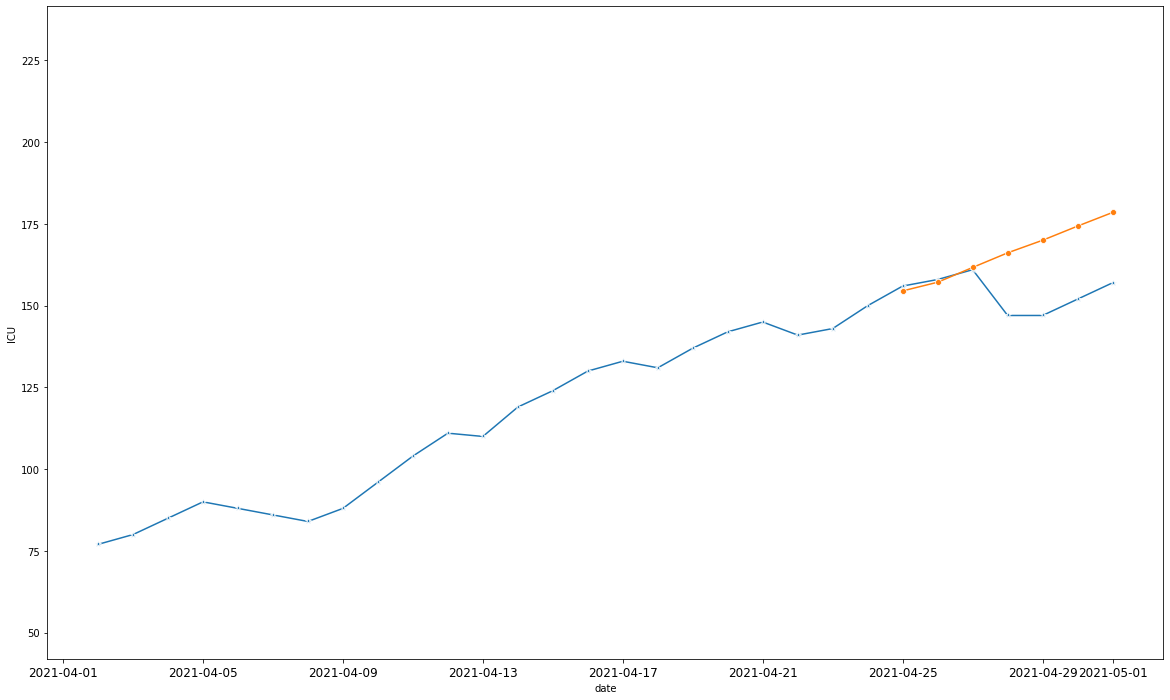

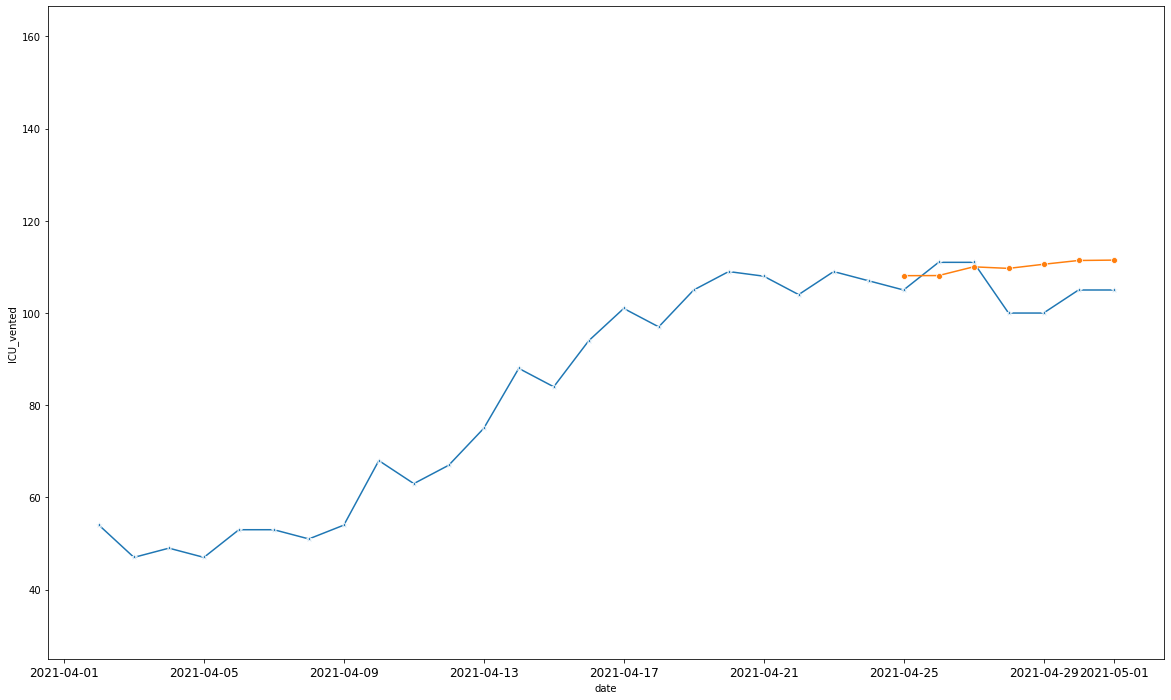

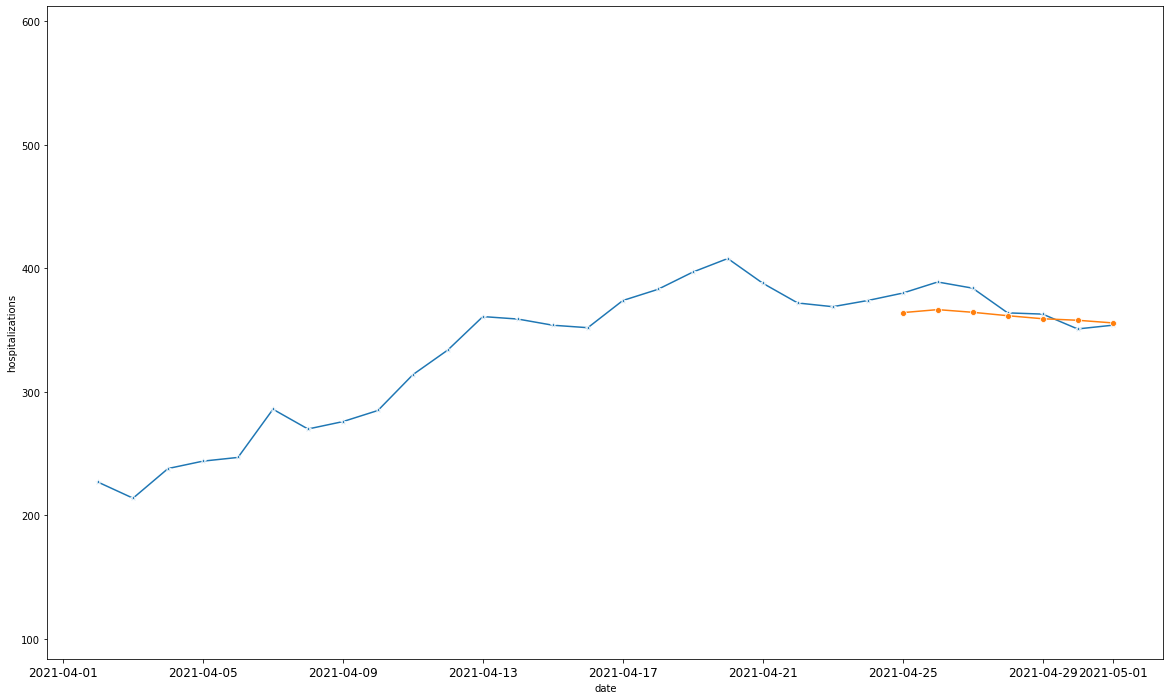

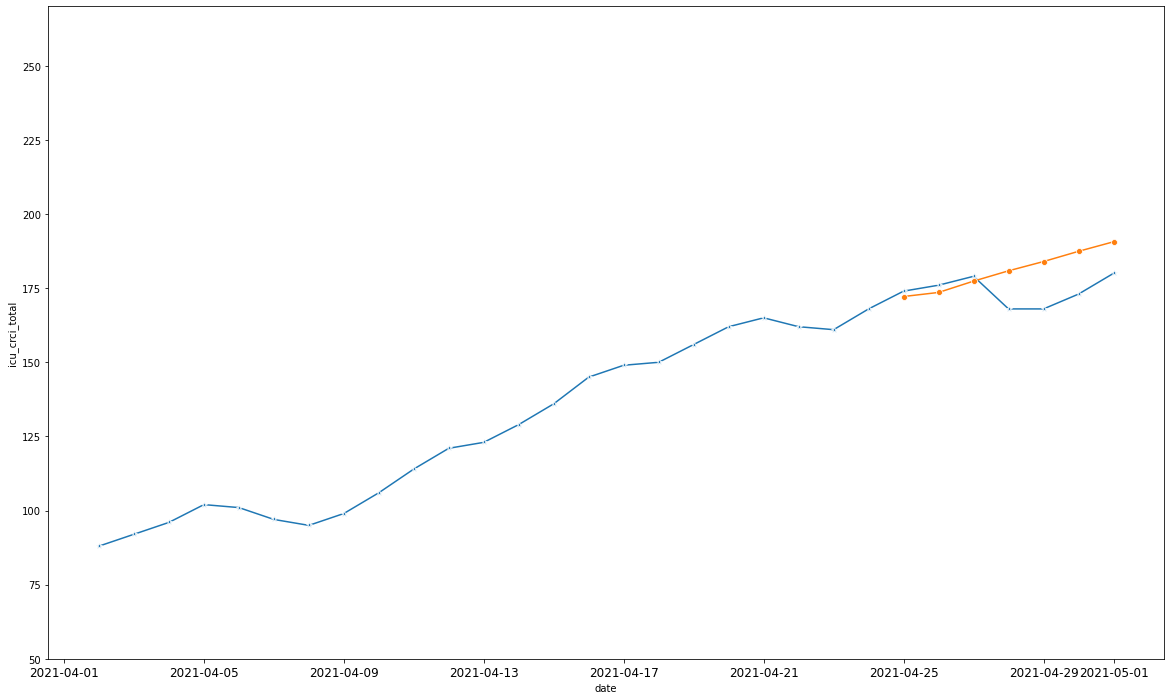

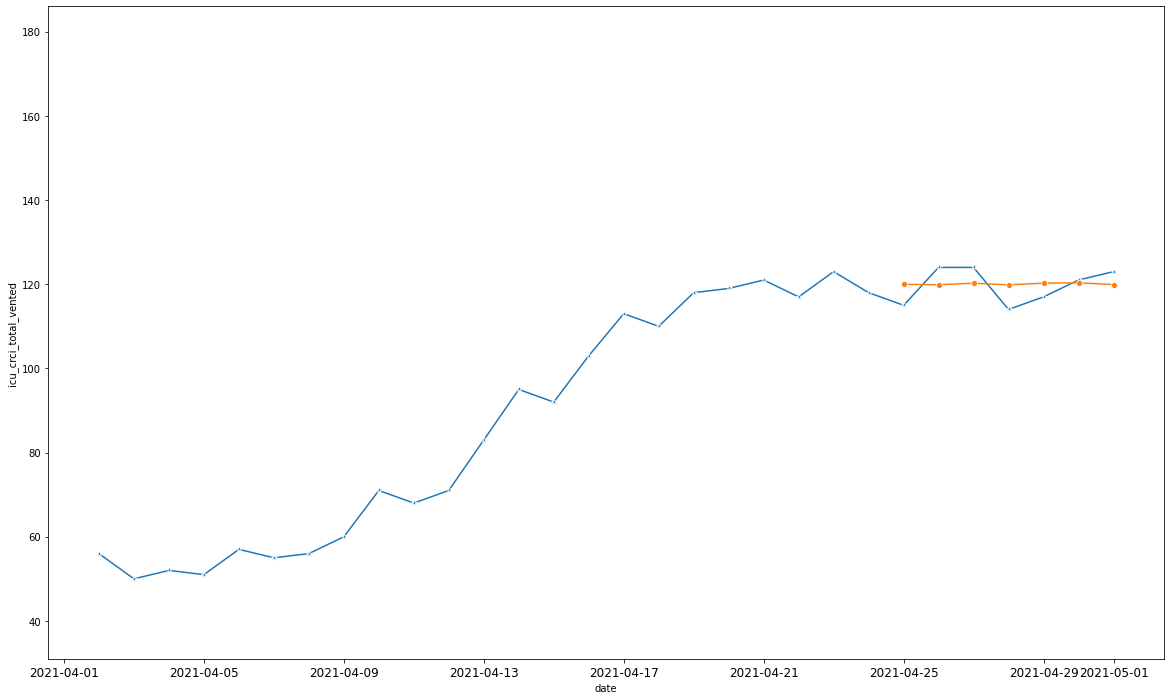

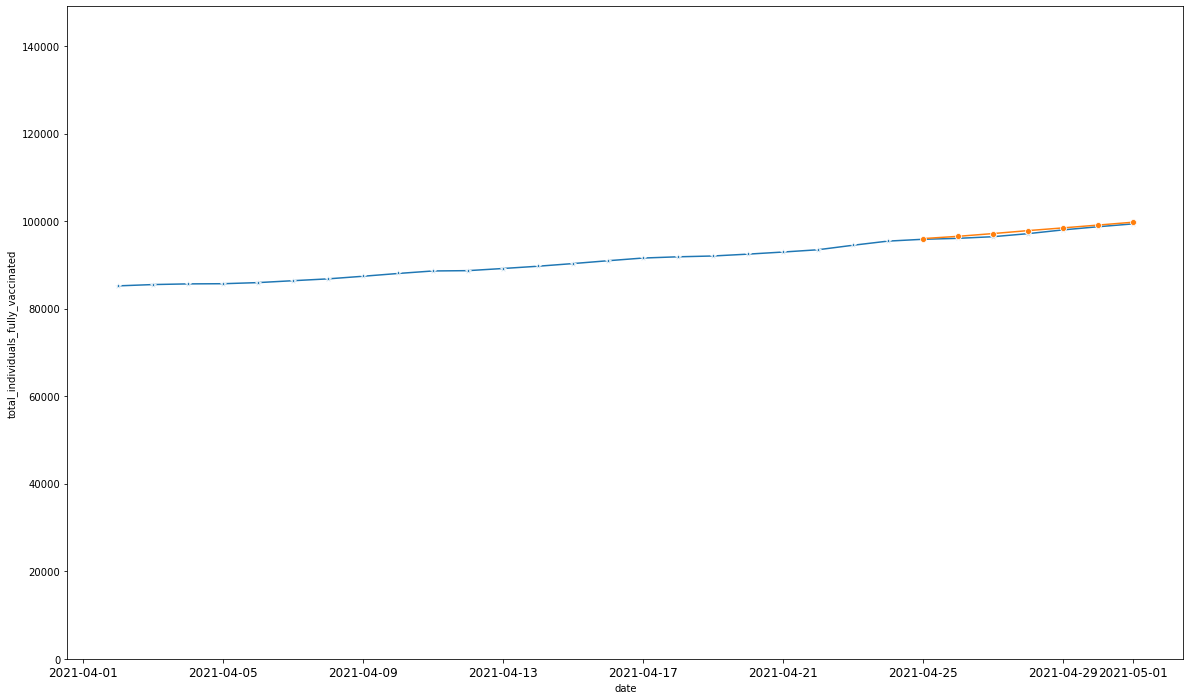

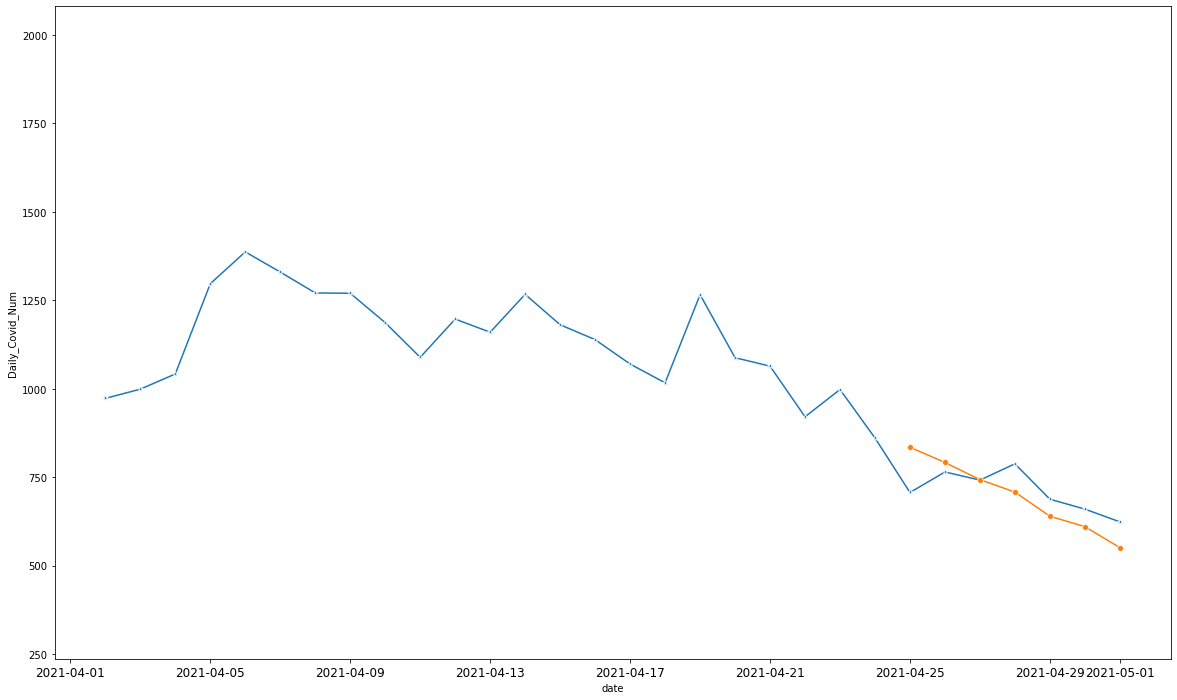

In [50]:
for i in range(0,len(df1.columns)):
    plt.figure(figsize=(20,12))
    sns.lineplot(x=df1.index[-30:],y=df1.iloc[-30:,i],marker='*')
    sns.lineplot(x=df1_test.index,y=df1_forecasted.iloc[:,i],marker='o')
    plt.xticks(fontsize=12)
    plt.ylim(np.min(df1.iloc[:,i]),np.max(df1.iloc[:,i])*1.5)
    plt.show()